## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [47]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('flight.csv')
pd.set_option('display.max_columns', None)
df.head()


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-05-19,WN,WN,WN,5460,WN,N756SA,5460,13198,MCI,"Kansas City, MO",10423,AUS,"Austin, TX",1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,0.0,NaN,0.0,N,110.0,105.0,89.0,1.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-07,F9,F9,F9,1673,F9,N705FR,1673,14100,PHL,"Philadelphia, PA",13204,MCO,"Orlando, FL",1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,0.0,NaN,0.0,N,160.0,163.0,130.0,1.0,861.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,AA,AA_CODESHARE,AA,4365,AX,N611AE,4365,11278,DCA,"Washington, DC",10868,CAE,"Columbia, SC",1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,0.0,NaN,0.0,N,100.0,87.0,71.0,1.0,408.0,0.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN
3,2018-01-07,UA,UA_CODESHARE,UA,4410,EV,N14573,4410,14783,SGF,"Springfield, MO",12266,IAH,"Houston, TX",1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,0.0,NaN,0.0,N,117.0,107.0,91.0,1.0,513.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-05-08,DL,DL,DL,2877,DL,N340DN,2877,14869,SLC,"Salt Lake City, UT",14107,PHX,"Phoenix, AZ",820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,0.0,NaN,0.0,N,101.0,93.0,69.0,1.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# def format_hour(x):   #format date
#     if pd.isnull(x):
#         return np.nan
#     else:
#         if x == 2400: x = 0
#         x = "{0:04d}".format(int(x))
#         hour = datetime.time(int(x[0:2]), int(x[2:4]))
#         return hour

def get_stat(group): #function to get stats - x.describe() does not work well 
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [38]:
data = [                   #features I want & will be working with later 
    'fl_date', 'mkt_carrier','origin','dest','crs_dep_time','dep_time','dep_delay','taxi_out',
    'wheels_off','wheels_on','taxi_in','crs_arr_time','arr_time','arr_delay','crs_elapsed_time',
    'actual_elapsed_time','air_time','distance'
]

In [39]:
df = df[data].dropna()

In [40]:
# df['dep_time'] = df['dep_time'].apply(format_hour)    #format HHMM
# df['crs_dep_time'] = df['crs_dep_time'].apply(format_hour)
# df['arr_time'] = df['arr_time'].apply(format_hour)
# df['crs_arr_time'] = df['crs_arr_time'].apply(format_hour)
# df['wheels_off'] = df['wheels_off'].apply(format_hour)
# df['wheels_on'] = df['wheels_on'].apply(format_hour)

In [41]:
date = df['fl_date'].str.split(pat = '-', expand=True)  #format split Year Month Day
df[['Year','Month','Day']] = date
df.drop(columns = 'fl_date')

,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,Year,Month,Day
0,WN,MCI,AUS,1110,1106.0,-4.0,11.0,1117.0,1246.0,5.0,1300,1251.0,-9.0,110.0,105.0,89.0,650.0,2019,05,19
1,F9,PHL,MCO,1533,1523.0,-10.0,14.0,1537.0,1747.0,19.0,1813,1806.0,-7.0,160.0,163.0,130.0,861.0,2018,04,07
2,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0,2018,01,01
3,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0,2018,01,07
4,DL,SLC,PHX,820,816.0,-4.0,19.0,835.0,844.0,5.0,901,849.0,-12.0,101.0,93.0,69.0,507.0,2019,05,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,WN,TUS,MDW,710,706.0,-4.0,8.0,714.0,1210.0,5.0,1225,1215.0,-10.0,195.0,189.0,176.0,1440.0,2018,03,14
99996,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0,2018,02,28
99997,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0,2018,03,17
99998,DL,ATL,LAX,2008,2006.0,-2.0,12.0,2018.0,2132.0,8.0,2150,2140.0,-10.0,282.0,274.0,254.0,1947.0,2018,09,09


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
delay_count = df.loc[df['arr_delay']>0]
delay_count['arr_delay'].describe()
33948/12
delay_count

In [129]:
delay_by_month = df[['Month','arr_delay']].groupby(['Month'])['arr_delay'].mean().sort_values()
delay_by_month


Month
09     1.452672
03     2.197540
11     2.532836
01     3.394647
10     3.683589
04     4.164554
12     5.505444
02     6.120882
05     6.123189
07     8.171147
08     8.608324
06    10.536463
Name: arr_delay, dtype: float64

Text(0, 0.5, 'Delay Counts')

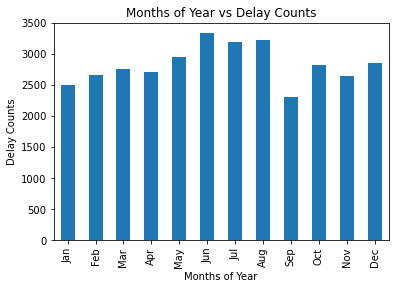

In [109]:
bar = delay_count['Month'].value_counts().sort_index(ascending=True)
bar_chart = bar.rename(index={'01': "Jan", '02': "Feb", '03': "Mar",'04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'})
barchart  = bar_chart.plot(kind="bar")
barchart.set_title('Months of Year vs Delay Counts')
barchart.set_xlabel('Months of Year')
barchart.set_ylabel('Delay Counts')
#barchart, total counts by month of delayed flights

In [119]:
peak = delay_count.loc[delay_count['Month']=='09']
peak['dep_delay'].count()

2309

,fl_date,mkt_carrier,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,Year,Month,Day
2,2018-01-01,AA,DCA,CAE,1359,1505.0,66.0,13.0,1518.0,1629.0,3.0,1539,1632.0,53.0,100.0,87.0,71.0,408.0,2018,01,01
3,2018-01-07,UA,SGF,IAH,1413,1424.0,11.0,10.0,1434.0,1605.0,6.0,1610,1611.0,1.0,117.0,107.0,91.0,513.0,2018,01,07
9,2019-03-10,DL,BOS,PHL,1459,1609.0,70.0,32.0,1641.0,1821.0,6.0,1636,1827.0,111.0,97.0,138.0,100.0,280.0,2019,03,10
11,2018-07-08,AA,PHL,MIA,1415,1426.0,11.0,12.0,1438.0,1644.0,9.0,1714,1653.0,-21.0,179.0,147.0,126.0,1013.0,2018,07,08
12,2018-12-27,AA,ROC,ORD,1807,1810.0,3.0,22.0,1832.0,1903.0,18.0,1924,1921.0,-3.0,137.0,131.0,91.0,528.0,2018,12,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,2018-02-05,DL,CLT,LGA,1600,1616.0,16.0,25.0,1641.0,1802.0,7.0,1806,1809.0,3.0,126.0,113.0,81.0,544.0,2018,02,05
99994,2018-03-13,DL,ATL,CVG,1628,1629.0,1.0,16.0,1645.0,1742.0,5.0,1755,1747.0,-8.0,87.0,78.0,57.0,373.0,2018,03,13
99996,2018-02-28,WN,ALB,MCO,1440,1446.0,6.0,12.0,1458.0,1720.0,5.0,1745,1725.0,-20.0,185.0,159.0,142.0,1073.0,2018,02,28
99997,2018-03-17,AA,LAS,CLT,2300,2343.0,43.0,11.0,2354.0,620.0,3.0,606,623.0,17.0,246.0,220.0,206.0,1916.0,2018,03,17


In [44]:
#Summer Months have the biggest delays, summer holiday leads to higher amount of family vacations, thus higher volume of flights lead 
#higher delay counts 

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [45]:
df['taxi_time'] = df['taxi_out'] - df['taxi_in']
tod = lambda x:((0,1)[x >= 900],2)[x >= 1800]
df['time_of_day'] = df['dep_time'].apply(tod)
#0 : before 9:00 - Morning
#1 : 9:00 - 18:00 - Day
#2 : 18:00 - 24:00 - Night


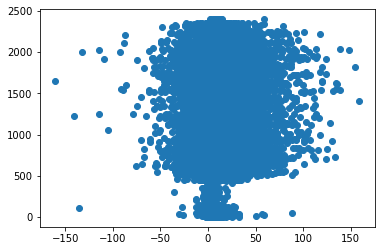

In [60]:
#most taxi time is between -50 to 50 min 
sca_gra = plt.scatter('taxi_time', 'dep_time', data=df)


In [ ]:
#df.loc[df['time_of_day']==0].count()
#22939/98006 | 23.4%
morning_time_data = df.loc[df['time_of_day']==0]
morning_time_data['taxi_time'].describe()
#mean 9.27min
#max 133min
#min -136min

In [ ]:
#df.loc[df['time_of_day']==1].count()
#52513/98006 | 53.5%
day_time_data = df.loc[df['time_of_day']==1]
day_time_data['taxi_time'].describe()
#mean 9.7min
#max 159min
#min -161min


In [ ]:
#df.loc[df['time_of_day']==2].count()
#22554/98006 | 23.0%
night_time_data = df.loc[df['time_of_day']==2]
night_time_data['taxi_time'].describe()
#mean 10.35min
#max 154min
#min -133min

In [81]:
#in conclusion, night time has the longest taxi time. Day time has the highest traffic volume, so higher traffic does not lead to longer taxi time.

count    52513.000000
mean         9.710148
std         11.501422
min       -161.000000
25%          4.000000
50%          8.000000
75%         14.000000
max        159.000000
Name: taxi_time, dtype: float64

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?